## Reimplement the Nadaraya Watson Model

For practice reimplement the model on your own

In [18]:
from d2l import torch as d2l
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Generate Training data

In [266]:
n_points = 300
noise_sigma = 0.2
x = torch.rand(n_points)*2*np.pi - np.pi
noise = noise_sigma*torch.randn(n_points)
t = torch.sin(x) + noise

sort_order = np.argsort(x)
x = x[sort_order]
t = t[sort_order]

n_test_points = 40
noise = noise_sigma*torch.randn(n_test_points)
x_test = torch.rand(n_test_points)*2*np.pi - np.pi
sort_order = np.argsort(x_test)
x_test = x_test[sort_order]

In [267]:
def plot_estimator(x, t, x_test, y):
    plt.scatter(x, t, label="t", color="orange", alpha=0.5)    
    plt.plot(x_test, y, linestyle=":", label="y")
    plt.legend()

## Mean Estimator

In [268]:
y = torch.mean(t).repeat(n_test_points)

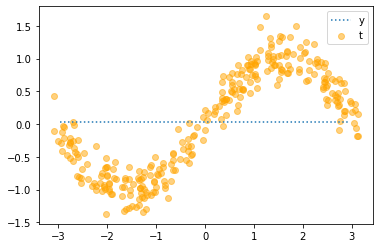

In [269]:
plot_estimator(x, t, x_test, y)

## Nadaraya Watson Estimator Non-parameteric

Attention Weights
    alpha(i,j) = (x_train_i, x_test_j)

In [270]:
zz1 = x.unsqueeze(0).repeat(n_test_points, 1)
zz2 = x_test.unsqueeze(1).repeat(1, n_points)

In [271]:
zz1.shape, zz2.shape

(torch.Size([40, 300]), torch.Size([40, 300]))

In [272]:
weight = 1
zz = -1/2*weight*(zz1 - zz2)**2

In [273]:
alpha = torch.softmax(zz, axis=1)

In [274]:
y_hat = torch.einsum("ij,j->i", alpha, t)

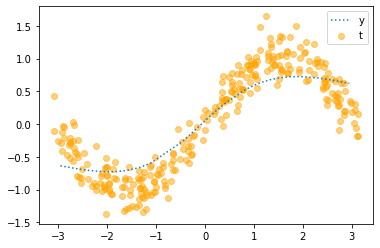

In [275]:
plot_estimator(x, t, x_test, y_hat)

## Parametric Model

In [276]:
class NWKernelRegression(nn.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = nn.parameter.Parameter(torch.randn(1), requires_grad=True)
        
    # queries = x, keys = x_train, values = t_train
    def forward(self, queries, keys, values):
        n_query = queries.shape[0]
        n_keys = keys.shape[0]
                
        zz1 = keys.unsqueeze(0).repeat(n_query, 1)
        zz2 = queries.unsqueeze(1).repeat(1, n_keys)
        weight = self.w
        zz = -1/2*weight*(zz1 - zz2)**2        
        alpha = torch.softmax(zz, axis=1)
        y_hat = torch.einsum("ij,j->i", alpha, t)
        return y_hat

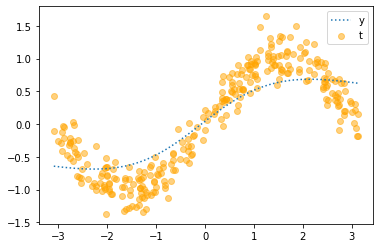

In [277]:
net = NWKernelRegression()
y_hat = net(x, x, t)
plot_estimator(x, t, x, y_hat.detach())

In [281]:
n_iter = 1000
net = NWKernelRegression()
loss = torch.nn.MSELoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.5)

for i in range(n_iter):
    y_hat = net(x, x, t)
    loss_val = loss(t, y_hat)
    
    trainer.zero_grad()
    loss_val.backward()
    trainer.step()
    print(loss_val.data)

tensor(0.3267)
tensor(0.1547)
tensor(0.1407)
tensor(0.1315)
tensor(0.1248)
tensor(0.1196)
tensor(0.1153)
tensor(0.1118)
tensor(0.1088)
tensor(0.1062)
tensor(0.1039)
tensor(0.1019)
tensor(0.1001)
tensor(0.0984)
tensor(0.0970)
tensor(0.0956)
tensor(0.0943)
tensor(0.0932)
tensor(0.0921)
tensor(0.0911)
tensor(0.0902)
tensor(0.0893)
tensor(0.0885)
tensor(0.0877)
tensor(0.0870)
tensor(0.0863)
tensor(0.0856)
tensor(0.0850)
tensor(0.0844)
tensor(0.0838)
tensor(0.0833)
tensor(0.0828)
tensor(0.0823)
tensor(0.0818)
tensor(0.0813)
tensor(0.0809)
tensor(0.0805)
tensor(0.0801)
tensor(0.0797)
tensor(0.0793)
tensor(0.0789)
tensor(0.0786)
tensor(0.0782)
tensor(0.0779)
tensor(0.0776)
tensor(0.0772)
tensor(0.0769)
tensor(0.0766)
tensor(0.0764)
tensor(0.0761)
tensor(0.0758)
tensor(0.0755)
tensor(0.0753)
tensor(0.0750)
tensor(0.0748)
tensor(0.0746)
tensor(0.0743)
tensor(0.0741)
tensor(0.0739)
tensor(0.0737)
tensor(0.0734)
tensor(0.0732)
tensor(0.0730)
tensor(0.0728)
tensor(0.0726)
tensor(0.0725)
tensor(0.0

tensor(0.0545)
tensor(0.0544)
tensor(0.0544)
tensor(0.0544)
tensor(0.0544)
tensor(0.0544)
tensor(0.0544)
tensor(0.0544)
tensor(0.0544)
tensor(0.0544)
tensor(0.0544)
tensor(0.0543)
tensor(0.0543)
tensor(0.0543)
tensor(0.0543)
tensor(0.0543)
tensor(0.0543)
tensor(0.0543)
tensor(0.0543)
tensor(0.0543)
tensor(0.0543)
tensor(0.0543)
tensor(0.0542)
tensor(0.0542)
tensor(0.0542)
tensor(0.0542)
tensor(0.0542)
tensor(0.0542)
tensor(0.0542)
tensor(0.0542)
tensor(0.0542)
tensor(0.0542)
tensor(0.0542)
tensor(0.0541)
tensor(0.0541)
tensor(0.0541)
tensor(0.0541)
tensor(0.0541)
tensor(0.0541)
tensor(0.0541)
tensor(0.0541)
tensor(0.0541)
tensor(0.0541)
tensor(0.0541)
tensor(0.0540)
tensor(0.0540)
tensor(0.0540)
tensor(0.0540)
tensor(0.0540)
tensor(0.0540)
tensor(0.0540)
tensor(0.0540)
tensor(0.0540)
tensor(0.0540)
tensor(0.0540)
tensor(0.0539)
tensor(0.0539)
tensor(0.0539)
tensor(0.0539)
tensor(0.0539)
tensor(0.0539)
tensor(0.0539)
tensor(0.0539)
tensor(0.0539)
tensor(0.0539)
tensor(0.0539)
tensor(0.0

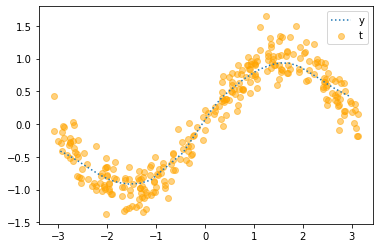

In [282]:
y_hat = net(x_test, x, t)
plot_estimator(x, t, x_test, y_hat.detach())